In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()
from datetime import datetime
import time
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from statsmodels import regression

In [32]:
symbols = ['BTC','ETH', 'AVAX', 'USDC']
# SET THE RISK FREE RATE  [ex: 1.25 = 1.25%, 10 = 10%]
rfr = 0.25
rfr /= 100
# start_date = AVAX token launch
start_date = datetime(2020, 9, 22, 0, 0)
# end_date = today
end_date = datetime.now()

 
#convert to UNIX
start_unix = time.mktime(start_date.timetuple())
end_unix = time.mktime(end_date.timetuple())
#print(start_unix)
#print(end_unix)
print(rfr)

0.0025


In [3]:
btc_prices = cg.get_coin_market_chart_range_by_id(id='bitcoin', vs_currency='USD', from_timestamp=start_unix, to_timestamp=end_unix)['prices']
date_list = []
for x in btc_prices:
    #correct for millisecond representation
    #convert timestamp to date format
    date_list.append(datetime.fromtimestamp(x[0]/1000).strftime('%Y-%m-%d'))

#separate dates from btc_prices
btc_prices = np.array(btc_prices)
btc_prices = np.delete(btc_prices, 0, 1)

#btc_prices
#date_list

In [4]:
eth_prices = cg.get_coin_market_chart_range_by_id(id='ethereum', vs_currency='USD', from_timestamp=start_unix, to_timestamp=end_unix)['prices']

eth_prices = np.array(eth_prices)
eth_prices = np.delete(eth_prices, 0, 1)

#eth_prices

In [5]:
avax_prices = cg.get_coin_market_chart_range_by_id(id='avalanche-2', vs_currency='USD', from_timestamp=start_unix, to_timestamp=end_unix)['prices']

avax_prices = np.array(avax_prices)
avax_prices = np.delete(avax_prices, 0, 1)

#avax_prices

In [6]:
usdc_prices = cg.get_coin_market_chart_range_by_id(id='usd-coin', vs_currency='USD', from_timestamp=start_unix, to_timestamp=end_unix)['prices']

usdc_prices = np.array(usdc_prices)
usdc_prices = np.delete(usdc_prices, 0, 1)

#usdc_prices

In [7]:
#setup GLP index dataframe
glp_df = pd.DataFrame(btc_prices, columns=['BTC_Price'], index=date_list)
glp_df.insert(1, 'ETH_Price', eth_prices)
glp_df.insert(2, 'AVAX_Price', avax_prices)
glp_df.insert(3, 'USDC_Price', usdc_prices)

#setup BTC baseline dataframe
btc_df = pd.DataFrame(btc_prices, columns=['BTC_Price'], index=date_list)

#glp_df

In [8]:
#set index weightings, SUM(w)=1
w = [0.15,0.2,0.2,0.45]

In [9]:
#calculate GLP components daily returns
glp_component_returns = glp_df.pct_change()[1:]


# calc portfolio returns of BTC for baseline
btc_returns = btc_df.pct_change()[1:]

glp_component_returns

,BTC_Price,ETH_Price,AVAX_Price,USDC_Price
2020-09-23,-0.028858,-0.066412,-0.339313,-0.002107
2020-09-24,0.049174,0.086408,0.310109,-0.000071
2020-09-25,-0.004152,0.007197,0.028222,-0.000443
2020-09-26,0.005729,0.008340,-0.037911,0.000247
2020-09-27,0.002058,0.007917,0.028356,0.001050
...,...,...,...,...
2022-01-31,0.015069,0.030281,0.028550,0.000381
2022-02-01,0.007266,0.040240,0.048869,-0.000443
2022-02-02,-0.047243,-0.038290,-0.074780,0.000239
2022-02-03,0.002713,-0.008573,0.001625,0.000929


In [10]:
#calculate weighted returns
glp_weighted_returns = (w * glp_component_returns)
btc_returns = (1 * btc_returns)
#print(glp_weighted_returns.head())

In [11]:
# calculate daily index returns by adding component returns across each row
# axis =1 tells pandas we want to add the rows
glp_index_returns = glp_weighted_returns.sum(axis=1)
glp_index_returns

2020-09-23   -0.086422
2020-09-24    0.086648
2020-09-25    0.006261
2020-09-26   -0.004944
2020-09-27    0.008036
                ...   
2022-01-31    0.014198
2022-02-01    0.018713
2022-02-02   -0.029593
2022-02-03   -0.000565
2022-02-04    0.074419
Length: 500, dtype: float64

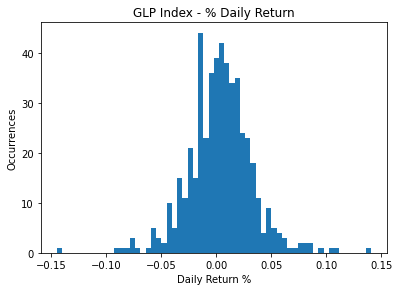

In [12]:
# GLP return distribution
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.hist(glp_index_returns, bins = 60)
ax1.set_xlabel('Daily Return %')
ax1.set_ylabel("Occurrences")
ax1.set_title("GLP Index - % Daily Return")
plt.show(); 

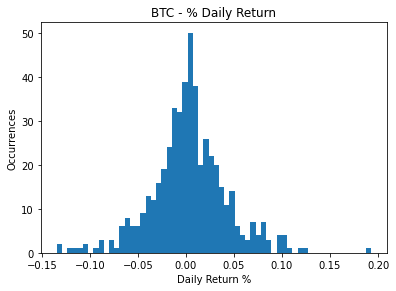

In [13]:
# BTC return distribution
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.hist(btc_returns, bins = 60)
ax1.set_xlabel('Daily Return %')
ax1.set_ylabel("Occurrences")
ax1.set_title("BTC - % Daily Return")
plt.show(); 

In [14]:
# calc cumulative returns

#GLP
glp_cumulative_ret = (glp_index_returns + 1).cumprod()

#BTC
btc_cumulative_ret = (btc_returns + 1).cumprod()

In [ ]:
# GLP cumulative return chart
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(glp_cumulative_ret)
ax1.set_xlabel('Date')
ax1.set_ylabel("Cumulative Returns")
ax1.set_title("GLP - Portfolio Cumulative Returns")
plt.show();

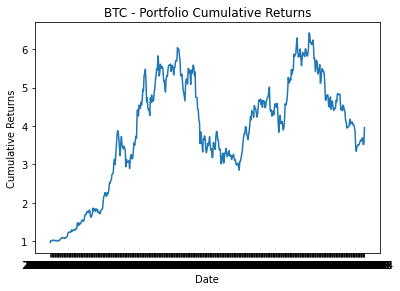

In [36]:
# BTC cumulative return chart
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(btc_cumulative_ret)
ax1.set_xlabel('Date')
ax1.set_ylabel("Cumulative Returns")
ax1.set_title("BTC - Portfolio Cumulative Returns")
plt.show();

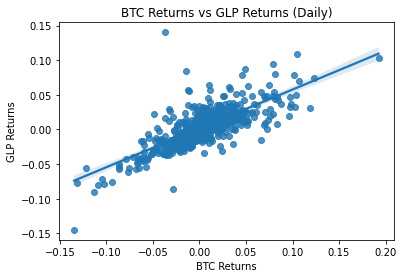

In [34]:
#Generate dot plot model for GLP/BTC returns
sns.regplot(x=btc_returns.values,
y=glp_index_returns.values)
plt.xlabel("BTC Returns")
plt.ylabel("GLP Returns")
plt.title("BTC Returns vs GLP Returns (Daily)")
plt.show()

In [18]:
#calculate GLP/BTC beta using linear regression
X = btc_returns.values
Y = glp_index_returns.values
def linreg(x,y):
    
    x = sm.add_constant(x)
    model = regression.linear_model.OLS(y,x).fit()
    
    # We are removing the constant
    x = x[:, 1]
    return model.params[0], model.params[1]

alpha, beta = linreg(X,Y)

#have to adjust btc_returns data representation to match glp_index_returns
l = []
for item in X:
    l.append(item[0])

correlation_coefficient = stats.pearsonr(l, Y)
print('alpha: ' + str(alpha))
print ('beta: ' + str(beta))
# correlation represented as (correlation, p-value)
print ('correlation_coefficient: ' + str(correlation_coefficient))


alpha: 0.0015374240864507458
beta: 0.560334202663588
correlation_coefficient: (0.7557912384612592, 1.2599447427374712e-93)


In [33]:
# compare average returns, volatility, and Sharpe ratio
glp_mean_ret = glp_index_returns.values.mean()
btc_mean_ret = btc_returns.values.mean()

glp_annual_ret = 365 * glp_mean_ret
btc_annual_ret = 365 * btc_mean_ret

glp_std_dev = glp_index_returns.values.std()
btc_std_dev = btc_returns.values.std()

glp_sharpe_ratio = (glp_annual_ret - rfr) / glp_std_dev
btc_sharpe_ratio = (btc_annual_ret - rfr) / btc_std_dev

print('For period between: ' + str(start_date) + ' to ' + str(end_date))
print()

print('BTC Average Daily Return: ' + str(btc_mean_ret))
print('GLP Average Daily Return: ' + str(glp_mean_ret))
print()

print('BTC Annual Return: ' + str(glp_annual_ret))
print('GLP Annual Return: ' + str(btc_annual_ret))
print()

print('BTC Daily Std. Dev: ' + str(btc_std_dev))
print('GLP Daily Std. Dev: ' + str(glp_std_dev))
print()

print('BTC Sharpe Ratio: ' + str(btc_sharpe_ratio))
print('GLP Sharpe Ratio: ' + str(glp_sharpe_ratio))
print()

For period between: 2020-09-22 00:00:00 to 2022-02-05 01:07:32.065548

BTC Average Daily Return: 0.003530009838512373
GLP Average Daily Return: 0.0035154093347081975

BTC Annual Return: 1.2831244071684922
GLP Annual Return: 1.288453591057016

BTC Daily Std. Dev: 0.03943071370299754
GLP Daily Std. Dev: 0.029233439604576576

BTC Sharpe Ratio: 32.612993027292255
GLP Sharpe Ratio: 43.80683301351945

